In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

### LOADING THE DATASET

In [6]:
digits=load_digits()
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### PLOTTING THE PIXEL IMAGES

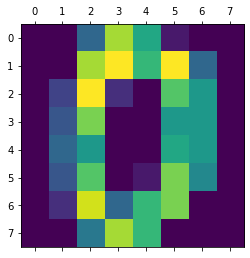

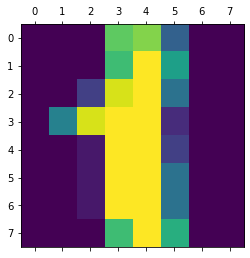

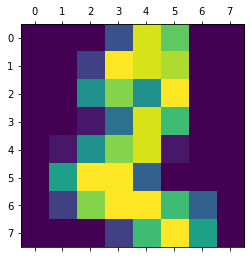

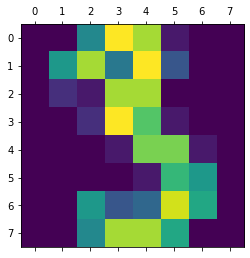

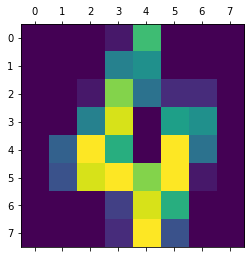

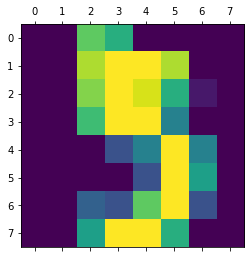

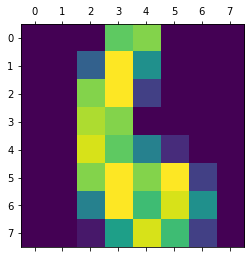

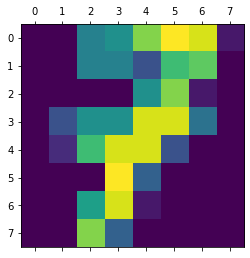

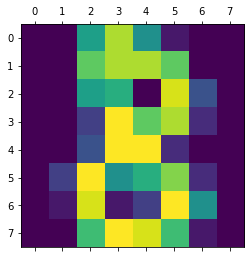

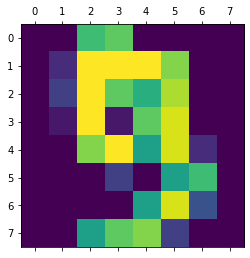

In [9]:
for i in range(0,10):
    plt.matshow(digits.data[i].reshape(8,8))           #to plot image

In [15]:
len(digits.target)

1797

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [16]:
x=df
y=digits.target

### DIVIDING THE DATASET IN TRAIN TEST 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### PERFORMING SCALING ON THE X_TRAIN,X_TEST

In [18]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

##### MODELING WITH LOGISTIC REGRESSION

In [19]:
model1=LogisticRegression()
model1.fit(x_train_scaled,y_train)
model1.score(x_test_scaled,y_test)
# WE ARE GETTING ACCURACY OF 96% WITHOUT REDUCING DIMENSIONS OF OUR DATA
# LET SEE HOW MUCH WE WILL GET AFTER DOING PCA

0.9611111111111111

## PCA WITH 2 COMPONENTS ONLY

In [43]:
pca2=PCA(n_components=2)
x_pca1=pca2.fit_transform(x)
x_train_pca2,x_test_pca2,y_train_pca2,y_test_pca2=train_test_split(x_pca1,y,test_size=0.2,random_state=0)
ss3=StandardScaler()
x_train_pca2_scaled=ss3.fit_transform(x_train_pca2)
x_test_pca2_scaled=ss3.transform(x_test_pca2)
model3=LogisticRegression()
model3.fit(x_train_pca2_scaled,y_train_pca2)
model3.score(x_test_pca2_scaled,y_test_pca2)
# WE ARE GETTING ONLY 58 % OF ACCURACY

0.5833333333333334

In [52]:
x_pca1.shape

(1797, 2)

#### PCA WITH 5 COMPONENTS ONLY

In [44]:
pca3=PCA(n_components=5)
x_pca2=pca3.fit_transform(x)
x_train_pca3,x_test_pca3,y_train_pca3,y_test_pca3=train_test_split(x_pca2,y,test_size=0.2,random_state=0)
ss4=StandardScaler()
x_train_pca3_scaled=ss4.fit_transform(x_train_pca3)
x_test_pca3_scaled=ss4.transform(x_test_pca3)
model4=LogisticRegression()
model4.fit(x_train_pca3_scaled,y_train_pca3)
model4.score(x_test_pca3_scaled,y_test_pca3)
# WE ARE GETTING ONLY 85 % OF ACCURACY

0.85

In [51]:
x_pca2.shape

(1797, 5)

#### PCA WITH RETAINING 95% OF USEFUL FEATURES

In [45]:
pca1=PCA(0.95)
x_pca3=pca1.fit_transform(x)
x_train_pca1,x_test_pca1,y_train_pca1,y_test_pca1=train_test_split(x_pca3,y,test_size=0.2,random_state=0)
ss2=StandardScaler()
x_train_pca1_scaled=ss2.fit_transform(x_train_pca1)
x_test_pca1_scaled=ss2.transform(x_test_pca1)
model2=LogisticRegression()
model2.fit(x_train_pca1_scaled,y_train_pca1)
model2.score(x_test_pca1_scaled,y_test_pca1)

0.95

In [50]:
x_pca3.shape

(1797, 29)

##### PCA RETAINING 98% OF USEFUL FEATURES

In [47]:
pca4=PCA(0.98)
x_pca4=pca4.fit_transform(x)
x_train_pca4,x_test_pca4,y_train_pca4,y_test_pca4=train_test_split(x_pca4,y,test_size=0.2,random_state=0)
ss5=StandardScaler()
x_train_pca4_scaled=ss5.fit_transform(x_train_pca4)
x_test_pca4_scaled=ss5.transform(x_test_pca4)
model5=LogisticRegression()
model5.fit(x_train_pca4_scaled,y_train_pca4)
model5.score(x_test_pca4_scaled,y_test_pca4)
# WE ARE GETTING ONLY 95.22 % OF ACCURACY

0.9527777777777777

In [49]:
x_pca4.shape

(1797, 37)